In [1]:
## Libraries and keys
import decimal
import pandas as pd
import numpy as np
import cvxopt
from cvxopt import blas, solvers
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px #(need to pip install plotly==4.4.1)

In [1]:
ETM = pd.read_excel("/Users/Yuxi/Desktop/RM2/E.T.M.1.xlsx", encoding='utf8')
ETM=pd.Series(ETM['PRICE'])
TZReal = pd.read_excel("/Users/Yuxi/Desktop/RM2/Tz Real.xlsx", encoding='utf8')
TZReal=pd.Series(TZReal['PRICE'])
TMYL = pd.read_excel("/Users/Yuxi/Desktop/RM2/TMYL.xlsx", encoding='utf8')
TMYL=pd.Series(TMYL['PRICE'])

NameError: name 'pd' is not defined

In [2]:
import datetime
import random

idx = pd.date_range('2019-01-01', periods=100, freq='d')
idx
#66 68 62 59 57 62 64 58 52 45
Didida1 = np.random.random_integers(62, 70, size=(1, 10))
Didida2 = np.random.random_integers(66, 73, size=(1, 10))
Didida3 = np.random.random_integers(58, 66, size=(1, 10))
Didida4 = np.random.random_integers(55, 63, size=(1, 10))
Didida5 = np.random.random_integers(52, 60, size=(1, 10))
Didida6 = np.random.random_integers(54, 64, size=(1, 10))
Didida7 = np.random.random_integers(58, 68, size=(1, 10))
Didida8 = np.random.random_integers(54, 62, size=(1, 10))
Didida9 = np.random.random_integers(48, 53, size=(1, 10))
Didida10 = np.random.random_integers(40, 48, size=(1, 10))

Didida = np.concatenate((Didida1, Didida2, Didida3, Didida4, Didida5, Didida6, Didida7, Didida8,
                         Didida9, Didida10), axis=None)

#35 38 36 33 35
Liverpool1 = np.random.random_integers(30, 40, size=(1, 20))
Liverpool2 = np.random.random_integers(35, 50, size=(1, 20))
Liverpool3 = np.random.random_integers(30, 45, size=(1, 20))
Liverpool4 = np.random.random_integers(25, 40, size=(1, 20))
Liverpool5 = np.random.random_integers(30, 40, size=(1, 20))

Liverpool = np.concatenate((Liverpool1, Liverpool2, Liverpool3, Liverpool4, Liverpool5), axis=None)

NameError: name 'pd' is not defined

In [4]:
idx = pd.Series(idx)
Didida = pd.Series(Didida)
Liverpool = pd.Series(Liverpool)

clean_data=pd.concat([TZReal,ETM,TMYL,Liverpool,Didida],axis=1)
clean_data.columns = ['TZReal', 'ETM','TMYL','Liverpool','Didida'] 
stocklist = ['TZReal', 'ETM','TMYL','Liverpool','Didida'] 
clean_data.index = idx
clean_data

,TZReal,ETM,TMYL,Liverpool,Didida
2019-01-01,50.0,200.0,120.00,33,67
2019-01-02,50.0,200.0,120.00,30,70
2019-01-03,50.0,200.0,120.00,31,65
2019-01-04,50.0,200.0,120.00,32,69
2019-01-05,50.0,212.0,122.00,31,70
...,...,...,...,...,...
2019-04-06,92.0,300.0,112.67,37,48
2019-04-07,95.6,300.0,108.00,32,48
2019-04-08,100.0,300.0,120.00,38,46
2019-04-09,98.0,301.5,140.71,39,48


In [5]:
## Transforming Data for optimization 
stocklist = ['TZReal', 'ETM','TMYL','Liverpool','Didida'] 
returnss = (clean_data.pct_change().dropna())
number = len(stocklist)
returns = returnss.values #as_matrix()
returnss

,TZReal,ETM,TMYL,Liverpool,Didida
2019-01-02,0.000000,0.000000,0.000000,-0.090909,0.044776
2019-01-03,0.000000,0.000000,0.000000,0.033333,-0.071429
2019-01-04,0.000000,0.000000,0.000000,0.032258,0.061538
2019-01-05,0.000000,0.060000,0.016667,-0.031250,0.014493
2019-01-06,0.000000,0.028302,0.020492,0.290323,0.000000
...,...,...,...,...,...
2019-04-06,-0.323529,0.020408,-0.020261,0.193548,0.116279
2019-04-07,0.039130,0.000000,-0.041448,-0.135135,0.000000
2019-04-08,0.046025,0.000000,0.111111,0.187500,-0.041667
2019-04-09,-0.020000,0.005000,0.172583,0.026316,0.043478


Text(0.5, 1.0, 'Cumulative Return of 5 Private Asset')

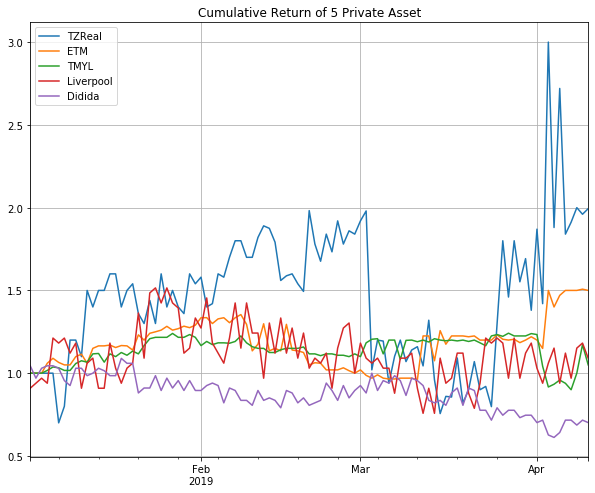

In [6]:
#了解各股票的收益率状况,并作图
returnss = returnss.dropna()
cumreturn = (1+ returnss).cumprod()
#sh_return.plot()
#plt.title('Daily Return of 5 Private Asset(2019)')
#plt.legend(bbox_to_anchor = (0.5,-0.3),ncol = 5,fancybox = True,shadow = True)
cumreturn.plot(figsize=(10, 8), grid=True)
plt.title('Cumulative Return of 5 Private Asset')

In [7]:
#Log Return
log_returns = np.log(clean_data/ clean_data.shift(1))
#log_returns.hist(bins=50, figsize=(12, 9))
rets = log_returns
year_ret = rets.mean() * 252
year_volatility = rets.cov() * 252

In [8]:
number_of_assets = 5
weights = np.random.random(number_of_assets)
weights /= np.sum(weights)
weights

array([0.1194868 , 0.21587471, 0.13364917, 0.01032363, 0.52066569])

In [9]:
portfolio_returns = []
portfolio_volatilities = []
for p in range (300):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(rets.mean() * weights) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(rets.cov() * 252, weights))))

In [10]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [11]:
def statistics(weights):        
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [12]:
bnds = tuple((0, 1) for x in range(number_of_assets))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [13]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -statistics(weights)[2]
opts = sco.minimize(min_func_sharpe, number_of_assets * [1. / number_of_assets,], method='SLSQP',  bounds=bnds, constraints=cons)
def min_func_variance(weights):
    return statistics(weights)[1] ** 2
optv = sco.minimize(min_func_variance, number_of_assets * [1. / number_of_assets,], method='SLSQP', bounds=bnds, constraints=cons)
def min_func_port(weights):
    return statistics(weights)[1]  
target_returns = np.linspace(0.2, 1.5, 30)

target_volatilities = []
for tret in target_returns:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, number_of_assets * [1. / number_of_assets,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    target_volatilities.append(res['fun'])

In [14]:
## List of stock tickers 

stocks1 = ['TZReal', 'ETM', 'TMYL','Liverpool', 'Didida'] # High 
stocks2 = [] # Low

# weights for stocks1
Minimal_gewicht1 = 0.0
Maximal_gewicht1 = 1.0
# weights for stocks2
Minimal_gewicht2 = 0.0
Maximal_gewicht2 = 1.0


Scale = 100 
rf = 0.01
stocklist = stocks1 + stocks2

In [15]:
## Optimization!

def optimal_portfolio(stocks, target):
    returnss = (clean_data[stocks].pct_change().dropna())
    returns = returnss.values
    returns = returns.T
    targetlen = target / len(returnss)
    n = len(returns)
    N1 = len(stocks)
    N2 = len(stocks2)
    returns = np.asmatrix(returns)
    pbar = cvxopt.matrix(np.mean(returns, axis=1))
    
    N=Scale
    mus_min=max(min(pbar),0)
    mus_max=max(pbar)
    mus_step=(mus_max - mus_min) / (N-1)
    mus = [mus_min + i*mus_step for i in range(N)]

    S = cvxopt.matrix(np.cov(returns))
    #pbar = opt.matrix(np.mean(returns, axis=1))
    
    #constraint matrices
    dank = -np.array(np.eye(n))
    dabbie = np.array(np.eye(n))
    #ye = np.vstack((dank, dabbie))
    
    dd = np.concatenate((-np.transpose(pbar), dank),0)
    mm = np.concatenate((np.transpose(pbar), dabbie),0)
    ye = np.vstack((dd, mm))
    G = cvxopt.matrix(ye, tc='d')
    
    #G = opt.matrix(np.concatenate((-np.transpose(pbar),ye),0))
    #G = opt.matrix(ye, tc='d')
    
    d1 = -np.ones((N1,1))*Minimal_gewicht1 
    e1 = np.ones((N1,1))*Maximal_gewicht1
    d2 = -np.ones((N2,1))*Minimal_gewicht2
    e2 =  np.ones((N2,1))*Maximal_gewicht2
    min_constraint = np.vstack((d1, d2))
    max_constraint = np.vstack((e1, e2))
    dodo = np.vstack((min_constraint, max_constraint))
    A = cvxopt.matrix(1.0, (1, n))
    b = cvxopt.matrix(1.0)
    
    """
    ## Calculate portfolios for efficient frontier (need this to find sharpe optimal portfolio)
    portfolios=[]
    for r_min in mus:
        eee = np.vstack((-np.ones((1,1))*r_min, min_constraint))
        fff = np.vstack((np.ones((1,1))*r_min, max_constraint))
        h = cvxopt.matrix(np.concatenate((eee, fff),0))
        
        #h = cvxopt.matrix(np.concatenate((-np.ones((1,1))*r_min, dodo),0))
        
        sol = solvers.qp(S, -pbar, G, h, A, b)['x']
        portfolios.append(sol)
    """
    
    

    ## Calculate target return portfolio
    eee = np.vstack((-np.ones((1,1))*targetlen, min_constraint))
    fff = np.vstack((np.ones((1,1))*targetlen, max_constraint))
    h = cvxopt.matrix(np.concatenate((eee, fff),0))
    portfolios = [solvers.qp(S, -pbar, G, h, A, b)['x']]
    
   
    ## Calculate Risk and Return
    returns = np.asarray([blas.dot(pbar, x) for x in portfolios])
    risks = np.asarray([np.sqrt(blas.dot(x, S*x)) for x in portfolios])
    
    # Approximates the position of the maximum Sharpe portfolio (also called tangent portfolio)
    # the bigger the 'scale' parameter the more accurate the calculation of the maximum sharpe portfolio!
    slope = (returns-(rf/252))/risks
    sharpe_opt = slope.argmax()

    return  returns, risks, portfolios, G, h, mus, sharpe_opt

exp_returns, exp_risk, weights, G, h, mus, sharpe = optimal_portfolio(stocklist,0.85)

     pcost       dcost       gap    pres   dres
 0: -7.3620e-03 -5.6257e+00  2e+01  2e+00  2e-16
 1: -7.3194e-03 -2.4174e+00  3e+00  2e-02  4e-16
 2: -7.3623e-03 -1.1826e-01  1e-01  7e-04  5e-16
 3: -7.1140e-03 -1.6471e-02  1e-02  5e-05  3e-17
 4: -7.2039e-03 -7.9565e-03  8e-04  4e-06  1e-16
 5: -7.2889e-03 -7.3867e-03  1e-04  4e-07  2e-15
 6: -7.3051e-03 -7.3114e-03  6e-06  1e-08  1e-13
 7: -7.3081e-03 -7.3086e-03  5e-07  3e-10  1e-13
 8: -7.3085e-03 -7.3085e-03  1e-08  4e-12  5e-12
Optimal solution found.


/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



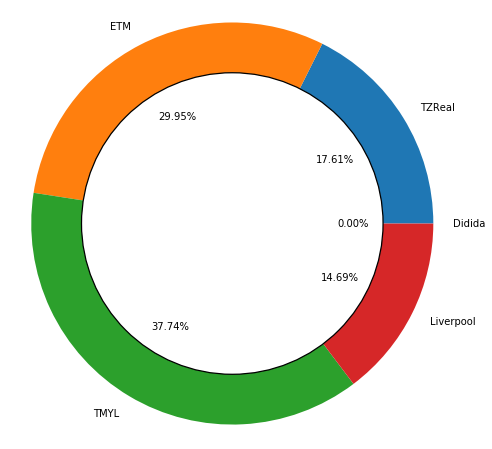

In [16]:
labels = stocklist
weights1 = np.array(weights[0]).tolist()
#explode = (0,0,0,0,0,0,0,0,0,0,0)

plt.pie(weights1, labels=labels, autopct='%.2f%%', shadow=False)
#Add a circle to give dougnut appearance 
circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
fig.set_size_inches(8,8)
fig.show()  

In [17]:
## This will print the expected annualized return, this should be the same or very close to the target 

print(exp_returns*len(returnss))

[0.85]


In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [19]:
from IPython import display
import os
def show_app(app, port = 9999, 
             width = 700, 
             height = 350, 
             offline = False,
            in_binder = None):
    in_binder ='JUPYTERHUB_SERVICE_PREFIX' in os.environ if in_binder is None else in_binder
    if in_binder:
        base_prefix = '{}proxy/{}/'.format(os.environ['JUPYTERHUB_SERVICE_PREFIX'], port)
        url = 'https://hub.mybinder.org{}'.format(base_prefix)
        app.config.requests_pathname_prefix = base_prefix
    else:
        url = 'http://localhost:%d' % port
        
    iframe = '<a href="{url}" target="_new">Open in new window</a><hr><iframe src="{url}" width={width} height={height}></iframe>'.format(url = url, 
                                                                                  width = width, 
                                                                                  height = height)
    
    display.display_html(iframe, raw = True)
    if offline:
        app.css.config.serve_locally = True
        app.scripts.config.serve_locally = True
    return app.run_server(debug=False, # needs to be false in Jupyter
                          host = '0.0.0.0',
                          port=port)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import base64

def get_x():
    return clean_data.index

def get_y(name):
    return clean_data[name]

def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)
app_iplot = dash.Dash()

logopic = '/Users/Tim/Desktop/RM2/logo.png' # replace with your own image
logo = base64.b64encode(open(logopic, 'rb').read()).decode("ascii")

app_iplot.layout = html.Div(style={'font-family':'sans-serif','width':'100%'},children=[html.Div([html.Div(className='container-fluid',children=[
      html.Img(
                    src='data:image/png;base64,{}'.format(logo),
                    className='five columns',
                    style={
                        'height': '13%',
                        'width': '13%',
                        'float':'right'
                    },
                ),
    html.H2(children='Private Asset Management Platform',style={'margin-left':'30%'}),      
    
    html.Div(
            [  
                html.H4(children='''
                        Welcome to TMYL, the portfolio simulator developed for Equisafe. We aim to create the best Customer Experience
                        with portfolio customization and risk diversification and possible higher returns. 
                        ''',
                        className='nine columns',style={'width':'80%','margin-top':'1%'}
                )
            ], className="row"
        ),
    
    html.H3(children='Pricing forcast of the private asset: Please choose the asset you want to estimate as below'), 
    
    dcc.Dropdown(id='pricingforcast',style={'width': '96%', 'display': 'inline-block'},
    options=[
        {'label': 'ETM', 'value': 'ETM'},
        {'label': 'TZReal', 'value': 'TZReal'},
        {'label': 'TMYL', 'value': 'TMYL'},
        {'label': 'Liverpool', 'value': 'Liverpool'}, 
        {'label': 'Didida', 'value': 'Didida'}, 
    ],
    value=['TMYL']
     )],style={'width': '98%', 'display': 'inline-block'}),
    html.Div([html.Img(id = 'cur_plot', src = '')], id='plot_div'),
     
    html.H3(children='Portfolio Selection: Please choose the asset you want to include in your portfolio'),                        
    dcc.Checklist(id='companies',
    options=[
        {'label': 'ETM', 'value': 'ETM'},
        {'label': 'TZReal', 'value': 'TZReal'},
        {'label': 'TMYL', 'value': 'TMYL'},
        {'label': 'Liverpool', 'value': 'Liverpool'}, 
        {'label': 'Didida', 'value': 'Didida'}, 
    ],
    value=['ETM','TZReal','TMYL']
    )],style={'width':'100%','display': 'inline-block'}),
                        
##Asset's price              
    html.Div(style={'font-family':'sans-serif','width':'49%','display': 'inline-block'}, className = 'row', 
             children = [html.H3(children = 'Historical Asset Price'),                           
    dcc.Graph(id = 'price',style={'height': 300,'width':'92%'})
]),
##Culmulative Return  
    html.Div(style={'font-family':'sans-serif','width':'49%','float': 'right'}, className = 'row', 
             children = [html.H3(children = 'Cumulative Return'),
    dcc.Graph(id = 'cumulative',style={'height': 300,'width':'92%'})                        
]), 
                             
##Frontier                                     
    html.Div(style={'font-family':'sans-serif','width':'49%','display': 'inline-block'}, className = 'row', 
             children = [html.H3(children = 'Efficient Frontier'),
    dcc.Graph(id = 'frontier',style={'height': 400,'width':'98%'})
    ]),  

                                      
##Portfolio PieChart                                                                  
    html.Div(style={'font-family':'sans-serif','width':'49%','float': 'right'}, className = 'row', 
             children = [html.H3(children = 'Expected return: Please enter your expected return of this portfolio'),dcc.Input(id = 'input01', type = 'number', value = 0.5),html.H3(children = 'Portfolio'),
                         html.Img(id='portfolio1', src ='')])
])

@app_iplot.callback(
    Output(component_id='cur_plot', component_property='src'),
    [Input(component_id = 'pricingforcast', component_property='value')]
)
def update_graph(input_value):
    dta=clean_data[input_value]
    fig, ax = plt.subplots(figsize=(15, 7))
    ax = dta.loc['2019-01-01':].plot(ax=ax)
    arma_mod30 = sm.tsa.ARMA(dta, (10,0)).fit(disp=False)
    fig = arma_mod30.plot_predict('2019-04-06', '2019-04-15', dynamic=True, ax=ax, plot_insample=False)
    out_url = fig_to_uri(fig)
    return out_url

@app_iplot.callback(Output(component_id='price', component_property = 'figure'),
              [Input(component_id='companies', component_property='value')])
def add_lines(inputvalue):
    my_list = inputvalue
    traces = []
    for i in my_list:
        traces.append(dict(
            x=get_x(),
            y=get_y(i),
            text=i,
            opacity=0.7,
            marker={
                'size': 15,
                'line': {'width': 0.5, 'color': 'white'}
            },
            name=i
        ))
    return {
        'data': traces,
        'layout': dict(
            xaxis={'title': 'Time'},
            yaxis={'title': 'Price'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            legend={'x': 0, 'y': 1},
            hovermode='closest',
            transition = {'duration': 50}
        )
    }

@app_iplot.callback(
    Output(component_id='cumulative', component_property='figure'),
    [Input(component_id = 'companies', component_property='value')]
)
def update_cumulatuve(iptv):
    dff = clean_data[iptv]
    ## Transforming Data for optimization 
    returnss = (dff.pct_change().dropna())
    #number = len(stocklist)
    returns = returnss.values #as_matrix()
    returnss = returnss.dropna()
    cumreturn = (1+ returnss).cumprod()
    traces = []
    for i in iptv:
        traces.append(dict(
            x=cumreturn.index,
            y=cumreturn[i],
            text=i,
            opacity=0.7,
            marker={
                'size': 15,
                'line': {'width': 0.5, 'color': 'white'}
            },
            name=i
        ))
    return {
        'data': traces,
        'layout': dict(
            xaxis={'title': 'Time'},
            yaxis={'title': 'Cumulative Return'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            legend={'x': 0, 'y': 1},
            hovermode='closest',
            transition = {'duration': 50}
        )
    }
#efficient frontier
@app_iplot.callback(
    Output(component_id='frontier', component_property='figure'),
    [Input(component_id = 'companies', component_property='value')]
)
def update_frontier(iptv): 
    dff = clean_data[iptv]
    # Transforming Data for optimization 
    my_returnss = (dff.pct_change().dropna())
    my_returns = my_returnss.values #as_matrix()
    my_returnss = my_returnss.dropna()
    my_log_returns = np.log(dff/dff.shift(1))
    my_rets = my_log_returns
    #assets number as input length
    nbr_as = len(iptv)
    #random value for assets number
    pfl_returns = []
    pfl_volatilities = []
    for p in range (500):
        wts = np.random.random(nbr_as)
        wts /= np.sum(wts)
        pfl_returns.append(np.sum(my_rets.mean() * wts) * 252)
        pfl_volatilities.append(np.sqrt(np.dot(wts.T,np.dot(my_rets.cov() * 252, wts))))
    pfl_returns = np.array(pfl_returns)
    pfl_volatilities = np.array(pfl_volatilities)
    
    def my_statistics(weights):        
        weights = np.array(weights)
        pret = np.sum(my_rets.mean() * weights) * 252
        pvol = np.sqrt(np.dot(weights.T, np.dot(my_rets.cov() * 252, weights)))
        return np.array([pret, pvol, pret / pvol])
    
    def my_min_func_sharpe(weights):
        return -my_statistics(weights)[2]
    
    def my_min_func_variance(weights):
        return my_statistics(weights)[1] ** 2
    
    def my_min_func_port(weights):
        return my_statistics(weights)[1]  
    
    my_bnds = tuple((0, 1) for x in range(nbr_as))
    my_cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    my_opts = sco.minimize(my_min_func_sharpe, nbr_as * [1. / nbr_as,], method='SLSQP',  bounds=my_bnds, constraints=my_cons)
    my_optv = sco.minimize(my_min_func_variance, nbr_as * [1. / nbr_as,], method='SLSQP', bounds=my_bnds, constraints=my_cons)
    my_target_returns = np.linspace(0.2, 1.5, 50)

    my_target_volatilities = []
    for tret in my_target_returns:
        cons = ({'type': 'eq', 'fun': lambda x:  my_statistics(x)[0] - tret},
                {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
        res = sco.minimize(my_min_func_port, nbr_as * [1. / nbr_as,], method='SLSQP',bounds=my_bnds, constraints=cons)
        my_target_volatilities.append(res['fun'])
            
    traces = []
    traces.append(dict(
        x= [my_statistics(my_opts['x'])[1]],
        y= [my_statistics(my_opts['x'])[0]],
        name = 'high',
        opacity=0.7,
        mode = 'markers',
        marker={
            'size': 20,
            'line': {'width': 0.5},
            'symbol':'star',
            'color':'red'}
        ))
    
    traces.append(dict(
        x= [my_statistics(my_optv['x'])[1]],
        y= [my_statistics(my_optv['x'])[0]],
        name = 'low',
        opacity=0.7,
        mode = 'markers',
        marker={
            'size': 20,
            'line': {'width': 0.5},
            'symbol':'star',
            'color':'yellow'}
        ))
    traces.append(dict(
        x=pfl_volatilities,
        y=pfl_returns,
        opacity=0.7,
        mode = 'markers',
        name = 'profile',
        marker={
            'size': 10,
            'line': {'width': 0.5},
            'symbol':'o',
            'color' : (pfl_returns - 0.02) / pfl_volatilities}
        ))

    traces.append(dict(
        x=my_target_volatilities,
        y=my_target_returns,
        name = 'Frontier line',
        opacity=0.7,
        marker={
            'size': 15,
            'line': {'width': 0.5},
            'symbol':'x',
            'color':'blue'}
        ))
   

    return {
        'data': traces,
        'layout': dict(
            xaxis={'title': 'Expected Volatility'},
            yaxis={'title': 'Expected Return'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            #legend={'x': 0, 'y': my_statistics(my_opts['x'])[0]},
            hovermode='closest',
            transition = {'duration': 50},
        )
    }

@app_iplot.callback(
    Output(component_id='portfolio1', component_property='src'),
    [Input(component_id = 'companies', component_property='value'), Input('input01', 'value')]
)
def update_portfolio(input_value,inputreturn):
    exp_returns, exp_risk, weights, G, h, mus, sharpe = optimal_portfolio(input_value,inputreturn)
    labels = input_value
    weights1 = np.array(weights[0]).tolist()
    fig1 = plt.figure()
    plt.pie(weights1, labels=labels, autopct='%.2f%%', shadow=False)
    #Add a circle to give dougnut appearance 
    circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
    
    fig1.gca().add_artist(circle)
    plt.axis('equal')
    fig1.set_size_inches(6,6)
    fig1.show() 
    out_url1 = fig_to_uri(fig1)
    return out_url1




In [21]:
show_app(app_iplot)

Open in new window

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:9999/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Mar/2020 15:10:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:16] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:17] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -8.1079e-03 -3.3469e+00  1e+01  2e+00  6e-16
 1: -8.1010e-03 -1.5299e+00  2e+00  3e-02  5e-16
 2: -7.9631e-03 -5.7650e-01  6e-01  9e-03  3e-16
 3: -2.6648e-03 -3.5728e-01  4e-01  5e-03  2e-15
 4: -3.1853e-03 -1.7408e-01  2e-01  2e-03  2e-15
 5: -4.5901e-03 -1.2264e-01  1e-01  4e-04  2e-14
 6: -4.3985e-03 -1.0276e-02  6e-03  2e-05  4e-16
 7: -4.4122e-03 -4.7847e-03  4e-04  1e-06  4e-16
 8: -4.4204e-03 -4.4405e-03  2e-05  4e-08  2e-13
 9: -4.4205e-03 -4.4207e-03  2e-07  4e-10  8e-14
10: -4.4205e-03 -4.4205e-03  2e-09  4e-12  7e-14
Optimal solution found.


/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:311: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:318: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

127.0.0.1 - - [20/Mar/2020 15:10:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:10:35] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:16

     pcost       dcost       gap    pres   dres
 0: -8.9592e-03 -4.5187e+00  2e+01  2e+00  4e-16
 1: -8.9411e-03 -2.0218e+00  2e+00  3e-02  6e-16
 2: -8.8044e-03 -8.1913e-01  9e-01  1e-02  5e-16
 3: -4.0984e-03 -5.9074e-01  8e-01  7e-03  1e-15
 4: -3.4493e-03 -1.7284e-01  2e-01  2e-03  3e-16
 5: -4.7004e-03 -1.1287e-01  1e-01  9e-04  1e-15
 6: -4.3202e-03 -6.7567e-03  3e-03  1e-05  3e-15
 7: -4.4877e-03 -5.4100e-03  1e-03  1e-06  3e-14
 8: -4.4930e-03 -4.5275e-03  4e-05  5e-08  1e-13
 9: -4.4935e-03 -4.4939e-03  5e-07  5e-10  1e-12
10: -4.4935e-03 -4.4935e-03  5e-09  5e-12  3e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 15:11:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:11:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:11:30] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3609e-03 -5.6255e+00  2e+01  2e+00  5e-16
 1: -7.3158e-03 -2.4345e+00  3e+00  2e-02  6e-16
 2: -7.2199e-03 -7.0533e-01  7e-01  6e-03  4e-16
 3: -2.4695e-03 -4.6864e-01  5e-01  3e-03  6e-16
 4: -4.7040e-03 -3.5515e-01  5e-01  2e-03  1e-15
 5: -4.1164e-03 -1.5055e-02  1e-02  7e-05  5e-16
 6: -4.4540e-03 -6.9747e-03  3e-03  2e-06  1e-14
 7: -4.5165e-03 -4.7451e-03  2e-04  2e-07  1e-13
 8: -4.5275e-03 -4.5360e-03  9e-06  3e-09  2e-12
 9: -4.5276e-03 -4.5277e-03  9e-08  3e-11  4e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 15:11:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:12:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:12:07] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:16:48] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  4e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  5e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  6e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  1e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  4e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  1e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  2e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  4e-15
 8:  8.5688e-04  6.8327e-04  2e-04  2e-07  1e-13
 9:  7.9838e-04  7.8836e-04  1e-05  4e-09  2e-13
10:  7.9138e-04  7.9121e-04  2e-07  4e-11  2e-12
11:  7.9125e-04  7.9124e-04  2e-09  4e-13  6e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 15:16:49] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  5e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  5e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  3e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  1e-16
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  5e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  9e-16
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  2e-14
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  3e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  8e-12
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3620e-03 -5.6257e+00  2e+01  2e+00  3e-16
 1: -7.3194e-03 -2.4174e+00  3e+00  2e-02  6e-16
 2: -7.3623e-03 -1.1826e-01  1e-01  7e-04  3e-16
 3: -7.1140e-03 -1.6471e-02  1e-02  5e-05  5e-17
 4: -7.2039e-03 -7.9565e-03  8e-04  4e-06  2e-16
 5: -7.2889e-03 -7.3867e-03  1e-04  4e-07  4e-15
 6: -7.3051e-03 -7.3114e-03  6e-06  1e-08  2e-14
 7: -7.3081e-03 -7.3086e-03  5e-07  3e-10  2e-1

127.0.0.1 - - [20/Mar/2020 15:16:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 15:16:50] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  5e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  5e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  3e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  1e-16
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  5e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  9e-16
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  2e-14
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  3e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  8e-12
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  5e-11
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 15:16:51] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  6e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  4e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  5e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  6e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  2e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  6e-15
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  4e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 15:16:55] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  5e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  5e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  3e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  1e-16
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  5e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  9e-16
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  2e-14
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  3e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  8e-12
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  5e-11
Optimal solution found.


/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 15:26:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:01:04] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  4e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  5e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  6e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  1e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  4e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  1e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  2e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  4e-15
 8:  8.5688e-04  6.8327e-04  2e-04  2e-07  1e-13
 9:  7.9838e-04  7.8836e-04  1e-05  4e-09  2e-13
10:  7.9138e-04  7.9121e-04  2e-07  4e-11  2e-12
11:  7.9125e-04  7.9124e-04  2e-09  4e-13  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3609e-03 -5.6255e+00  2e+01  2e+00  5e-16
 1: -7.3158e-03 -2.4345e+00  3e+00  2e-02  6e-16
 2: -7.2199e-03 -7.0533e-01  7e-01  6e-03  4e-16
 3: -2.4695e-03 -4.6864e-01  5e-01  3e-03  6e-16
 4: -4.7040e-03 -3.5515e-01  5e-01  2e-03  1e-15
 5: -4.1164e-03 -1.5055e-02  1e-02  7e-05  5e-1

127.0.0.1 - - [20/Mar/2020 16:01:04] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 16:14:44] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 16:15:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:15:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:15:52] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -3.5344e-03 -4.5131e+00  2e+01  2e+00  5e-16
 1: -3.5269e-03 -1.9935e+00  2e+00  2e-02  4e-16
 2: -3.5529e-03 -1.0486e-01  1e-01  8e-04  2e-16
 3: -3.8440e-03 -9.2615e-03  5e-03  4e-05  2e-17
 4: -4.1467e-03 -5.1270e-03  1e-03  6e-06  4e-16
 5: -4.2421e-03 -4.3501e-03  1e-04  5e-07  7e-15
 6: -4.2647e-03 -4.2727e-03  8e-06  8e-09  9e-15
 7: -4.2682e-03 -4.2695e-03  1e-06  9e-10  2e-13
 8: -4.2691e-03 -4.2692e-03  1e-07  5e-11  1e-12
 9: -4.2691e-03 -4.2691e-03  1e-09  5e-13  2e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 16:15:53] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -3.5341e-03 -4.5129e+00  2e+01  2e+00  4e-16
 1: -3.5257e-03 -2.0095e+00  2e+00  2e-02  6e-16
 2: -3.4913e-03 -6.7239e-01  7e-01  7e-03  2e-16
 3: -2.9689e-04 -4.6620e-01  7e-01  6e-03  3e-16
 4:  1.4548e-03 -7.0390e-02  9e-02  5e-04  2e-16
 5:  6.2452e-04 -3.7456e-02  7e-02  4e-04  3e-16
 6:  9.5824e-04  4.5417e-05  1e-03  4e-06  1e-15
 7:  8.3947e-04  7.5010e-04  1e-04  2e-07  5e-14
 8:  7.9633e-04  7.8988e-04  7e-06  3e-09  9e-13
 9:  7.9134e-04  7.9123e-04  1e-07  3e-11  5e-12
10:  7.9124e-04  7.9124e-04  1e-09  3e-13  6e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 16:17:11] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Users/Tim/opt/anaconda3/lib/python3.7/

127.0.0.1 - - [20/Mar/2020 16:17:11] "POST /_dash-update-component HTTP/1.1" 500 -


     pcost       dcost       gap    pres   dres
 0: -3.5341e-03 -4.5129e+00  2e+01  2e+00  4e-16
 1: -3.5257e-03 -2.0095e+00  2e+00  2e-02  6e-16
 2: -3.4913e-03 -6.7239e-01  7e-01  7e-03  2e-16
 3: -2.9689e-04 -4.6620e-01  7e-01  6e-03  3e-16
 4:  1.4548e-03 -7.0390e-02  9e-02  5e-04  2e-16
 5:  6.2452e-04 -3.7456e-02  7e-02  4e-04  3e-16
 6:  9.5824e-04  4.5417e-05  1e-03  4e-06  1e-15
 7:  8.3947e-04  7.5010e-04  1e-04  2e-07  5e-14
 8:  7.9633e-04  7.8988e-04  7e-06  3e-09  9e-13
 9:  7.9134e-04  7.9123e-04  1e-07  3e-11  5e-12
10:  7.9124e-04  7.9124e-04  1e-09  3e-13  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5346e-03 -4.5131e+00  2e+01  2e+00  5e-16
 1: -3.5277e-03 -2.0054e+00  2e+00  2e-02  4e-16
 2: -3.5800e-03 -5.4499e-01  6e-01  6e-03  5e-16
 3: -4.6589e-03 -3.9304e-01  5e-01  4e-03  5e-16
     pcost       dcost       gap    pres   dres 4: -4.4313e-03 -1.8755e-01  2e-01  2e-03  2e-16

 0: -3.5347e-03 -4.5131e+00  2e+01  2e+00  3e-16

127.0.0.1 - - [20/Mar/2020 16:17:12] "POST /_dash-update-component HTTP/1.1" 200 -


 6: -4.8725e-03 -8.9239e-03  5e-03  2e-05  1e-15
 3: -4.6486e-03 -4.1281e-01  6e-01  5e-03  3e-16
 4: -4.2587e-03 -1.8466e-01  2e-01  2e-03  2e-16
 5: -4.8130e-03 -1.0860e-01  1e-01  7e-04  6e-16 7: -5.5715e-03 -6.1141e-03  6e-04  8e-07  6e-14

 6: -4.8064e-03 -9.0283e-03  5e-03  2e-05  2e-15 8: -5.7248e-03 -5.7595e-03  4e-05  1e-08  2e-13

 9: -5.7444e-03 -5.7451e-03  8e-07  2e-10  2e-12
10: -5.7449e-03 -5.7449e-03  8e-09  2e-12  7e-12
Optimal solution found.
 7: -5.5667e-03 -6.1077e-03  6e-04  8e-07  4e-14
 8: -5.7319e-03 -5.7556e-03  2e-05  1e-08  7e-14
 9: -5.7447e-03 -5.7450e-03  3e-07  1e-10  8e-13
10: -5.7449e-03 -5.7449e-03  3e-09  1e-12  2e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 16:17:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:17:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:17:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:17:30] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  4e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  5e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  4e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  3e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  8e-14
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  2e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 16:17:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:18:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 16:21:03] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3588e-03 -5.6250e+00  2e+01  2e+00  4e-16
 1: -7.3090e-03 -2.4664e+00  3e+00  3e-02  4e-16
 2: -7.0199e-03 -1.3389e+00  1e+00  2e-02  4e-16
 3: -1.5987e-03 -9.3494e-01  1e+00  1e-02  4e-15
 4:  1.3775e-03 -1.1053e-01  3e-01  3e-03  1e-15
 5:  3.5079e-03  7.2690e-03  6e-02  8e-04  1e-15
 6:  3.6062e-03  1.4282e-01  4e-02  5e-04  5e-15
 7:  3.6020e-03  1.9856e+00  7e-02  5e-04  4e-14
 8:  3.6115e-03  8.1634e+01  5e-01  5e-04  2e-12
 9:  3.6129e-03  4.1745e+03  2e+01  5e-04  2e-10
10:  3.6148e-03  5.4905e+05  1e+03  5e-04  1e-07
11:  3.6160e-03  2.1151e+08  1e+05  5e-04  5e-05
12:  3.6165e-03  3.8210e+11  2e+07  5e-04  8e-02
13:  3.6165e-03  9.1385e+15  6e+09  5e-04  6e+02
14:  3.6165e-03  1.4883e+22  9e+13  5e-04  6e+08
15:  3.6165e-03  2.1724e+30  1e+21  5e-04  5e+16
16:  3.6165e-03  3.1863e+39  2e+28  5e-04  6e+25
17:  3.6165e-03  2.2534e+50  8e+38  5e-04  7e+36
18:  3.6165e-03  3.3243e+61  6e+49  5e-04  9e+47
19:  3.6165e-03  4.85

127.0.0.1 - - [20/Mar/2020 18:17:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:17:33] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  4e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  5e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  4e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  3e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  8e-14
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  9e-13
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:17:34] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3649e-03 -5.6260e+00  2e+01  2e+00  4e-16
 1: -7.3299e-03 -2.4620e+00  3e+00  3e-02  8e-16
 2: -7.6377e-03 -1.2620e+00  1e+00  1e-02  5e-16
 3: -9.7610e-03 -8.7460e-01  1e+00  8e-03  4e-16
 4: -9.7626e-03 -4.3922e-01  6e-01  3e-03  1e-15
 5: -1.0405e-02 -1.6599e-01  2e-01  4e-04  3e-15
 6: -1.0404e-02 -1.5167e-02  5e-03  1e-05  6e-16
 7: -1.0736e-02 -1.1084e-02  4e-04  3e-07  2e-13
 8: -1.0806e-02 -1.0850e-02  5e-05  3e-08  9e-13
 9: -1.0830e-02 -1.0830e-02  8e-07  4e-10  1e-12
10: -1.0830e-02 -1.0830e-02  8e-09  4e-12  3e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:17:35] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  4e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  5e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  4e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  3e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  8e-14
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  2e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:17:36] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  3e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  7e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  4e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  2e-16
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  3e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  4e-15
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  4e-14
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  6e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  1e-11
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  4e-11
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:17:36] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  3e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  6e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  7e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  2e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  6e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  2e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  2e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  2e-15
 8:  8.5688e-04  6.8327e-04  2e-04  2e-07  8e-14
 9:  7.9838e-04  7.8836e-04  1e-05  4e-09  3e-13
10:  7.9138e-04  7.9121e-04  2e-07  4e-11  2e-12
11:  7.9125e-04  7.9124e-04  2e-09  4e-13  2e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:17:37] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3609e-03 -5.6255e+00  2e+01  2e+00  4e-16
 1: -7.3158e-03 -2.4345e+00  3e+00  2e-02  6e-16
 2: -7.2199e-03 -7.0533e-01  7e-01  6e-03  1e-16
 3: -2.4695e-03 -4.6864e-01  5e-01  3e-03  9e-16
 4: -4.7040e-03 -3.5515e-01  5e-01  2e-03  7e-16
 5: -4.1164e-03 -1.5055e-02  1e-02  7e-05  2e-16
 6: -4.4540e-03 -6.9747e-03  3e-03  2e-06  8e-15
 7: -4.5165e-03 -4.7451e-03  2e-04  2e-07  3e-13
 8: -4.5275e-03 -4.5360e-03  9e-06  3e-09  3e-12
 9: -4.5276e-03 -4.5277e-03  9e-08  3e-11  9e-12
Optimal solution found.


/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 18:21:20] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 18:34:02] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 18:34:15] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:36:02] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  3e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  6e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  7e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  2e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  6e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  2e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  2e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  2e-15
 8:  8.5688e-04  6.8327e-04  2e-04  2e-07  8e-14
 9:  7.9838e-04  7.8836e-04  1e-05  4e-09  3e-13
10:  7.9138e-04  7.9121e-04  2e-07  4e-11  2e-12
11:  7.9125e-04  7.9124e-04  2e-09  4e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  3e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  7e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  4e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  2e-16
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  3e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  4e-1

127.0.0.1 - - [20/Mar/2020 18:36:03] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  4e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  5e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  4e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  3e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  8e-14
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  9e-13
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:36:07] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:39:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:39:58] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -6.3193e-03 -4.5193e+00  2e+01  2e+00  3e-16
 1: -6.2938e-03 -1.9976e+00  2e+00  2e-02  2e-16
 2: -6.3824e-03 -8.4362e-02  8e-02  6e-04  1e-16
 3: -6.5766e-03 -8.9332e-03  2e-03  2e-05  6e-17
 4: -6.7778e-03 -7.0068e-03  2e-04  1e-06  2e-15
 5: -6.8349e-03 -6.8679e-03  3e-05  1e-07  3e-14
 6: -6.8483e-03 -6.8504e-03  2e-06  3e-09  9e-14
 7: -6.8497e-03 -6.8498e-03  3e-08  4e-11  1e-13
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:39:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:39:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:39:59] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -8.1083e-03 -3.3471e+00  1e+01  2e+00  4e-16
 1: -8.1028e-03 -1.5205e+00  2e+00  2e-02  2e-16
 2: -8.0471e-03 -3.2005e-01  3e-01  4e-03  5e-17
 3: -6.2879e-03 -1.4903e-01  2e-01  2e-03  5e-16
 4: -7.1046e-03 -8.7311e-02  9e-02  7e-04  6e-16
 5: -6.8522e-03 -7.8089e-03  1e-03  8e-06  5e-16
 6: -6.8498e-03 -6.8599e-03  1e-05  8e-08  4e-17
 7: -6.8498e-03 -6.8499e-03  1e-07  8e-10  2e-15
 8: -6.8498e-03 -6.8498e-03  1e-09  8e-12  1e-14
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:40:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:40:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:40:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:40:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:40:48] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -8.9597e-03 -4.5189e+00  2e+01  2e+00  7e-16
 1: -8.9432e-03 -2.0091e+00  2e+00  2e-02  4e-16
 2: -8.8851e-03 -4.8568e-01  5e-01  5e-03  3e-16
 3: -5.8635e-03 -3.0632e-01  3e-01  2e-03  5e-16
 4: -7.4949e-03 -2.1845e-01  3e-01  2e-03  1e-15
 5: -6.9099e-03 -1.3448e-02  8e-03  4e-05  2e-15
 6: -7.1373e-03 -7.7078e-03  6e-04  2e-06  6e-14
 7: -7.1690e-03 -7.1927e-03  2e-05  3e-08  3e-13
 8: -7.1691e-03 -7.1694e-03  3e-07  3e-10  3e-13
 9: -7.1691e-03 -7.1691e-03  3e-09  3e-12  5e-13
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 18:40:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 18:41:13] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 19:09:42] "POST /_dash-update-component HTTP/1.1" 200 -
/Users/Tim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

127.0.0.1 - - [20/Mar/2020 19:10:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 19:10:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 19:10:24] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  7e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  6e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  6e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  5e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  9e-15
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  3e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 19:10:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 19:10:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 19:11:34] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  5e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  6e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  3e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  9e-17
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  4e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  3e-15
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  1e-13
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  7e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  2e-11
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  2e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  6e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  5e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  1e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  2e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  3e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  4e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  2e-1

127.0.0.1 - - [20/Mar/2020 19:11:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2020 19:11:34] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3609e-03 -5.6255e+00  2e+01  2e+00  5e-16
 1: -7.3158e-03 -2.4345e+00  3e+00  2e-02  6e-16
 2: -7.2199e-03 -7.0533e-01  7e-01  6e-03  2e-16
 3: -2.4695e-03 -4.6864e-01  5e-01  3e-03  6e-16
 4: -4.7040e-03 -3.5515e-01  5e-01  2e-03  2e-15
 5: -4.1164e-03 -1.5055e-02  1e-02  7e-05  5e-16
 6: -4.4540e-03 -6.9747e-03  3e-03  2e-06  4e-15
 7: -4.5165e-03 -4.7451e-03  2e-04  2e-07  2e-13
 8: -4.5275e-03 -4.5360e-03  9e-06  3e-09  8e-13
 9: -4.5276e-03 -4.5277e-03  9e-08  3e-11  5e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 19:11:48] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3593e-03 -5.6251e+00  2e+01  2e+00  2e-16
 1: -7.3107e-03 -2.4584e+00  3e+00  3e-02  6e-16
 2: -7.0667e-03 -1.2201e+00  1e+00  1e-02  5e-16
 3: -1.7974e-03 -8.9666e-01  1e+00  1e-02  1e-15
 4:  5.3738e-04 -1.5464e-01  2e-01  2e-03  2e-16
 5:  1.4440e-03 -4.3493e-02  5e-02  3e-04  3e-16
 6:  9.4112e-04 -2.8439e-02  4e-02  2e-04  4e-16
 7:  1.0961e-03 -1.8615e-04  2e-03  8e-06  2e-15
 8:  8.5688e-04  6.8327e-04  2e-04  2e-07  9e-14
 9:  7.9838e-04  7.8836e-04  1e-05  4e-09  2e-13
10:  7.9138e-04  7.9121e-04  2e-07  4e-11  3e-12
11:  7.9125e-04  7.9124e-04  2e-09  4e-13  8e-12
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 19:11:49] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3618e-03 -5.6257e+00  2e+01  2e+00  5e-16
 1: -7.3189e-03 -2.4198e+00  3e+00  2e-02  6e-16
 2: -7.3364e-03 -2.1870e-01  2e-01  1e-03  3e-16
 3: -6.6868e-03 -4.4728e-02  4e-02  2e-04  9e-17
 4: -6.8075e-03 -8.2859e-03  2e-03  8e-06  6e-17
 5: -6.9345e-03 -7.0358e-03  1e-04  1e-07  5e-15
 6: -6.9515e-03 -6.9606e-03  9e-06  4e-09  2e-13
 7: -6.9543e-03 -6.9561e-03  2e-06  7e-10  5e-13
 8: -6.9550e-03 -6.9553e-03  3e-07  9e-11  2e-11
 9: -6.9552e-03 -6.9552e-03  3e-08  6e-12  2e-11
Optimal solution found.


127.0.0.1 - - [20/Mar/2020 19:11:49] "POST /_dash-update-component HTTP/1.1" 200 -


     pcost       dcost       gap    pres   dres
 0: -7.3619e-03 -5.6257e+00  2e+01  2e+00  7e-16
 1: -7.3192e-03 -2.4184e+00  3e+00  2e-02  6e-16
 2: -7.3515e-03 -1.5927e-01  2e-01  1e-03  4e-16
 3: -6.9558e-03 -2.3763e-02  2e-02  1e-04  6e-17
 4: -7.0421e-03 -8.0877e-03  1e-03  6e-06  2e-16
 5: -7.1453e-03 -7.3001e-03  2e-04  6e-07  5e-15
 6: -7.1650e-03 -7.1742e-03  9e-06  2e-08  9e-15
 7: -7.1685e-03 -7.1694e-03  9e-07  5e-10  1e-13
 8: -7.1691e-03 -7.1691e-03  6e-08  2e-11  3e-12
Optimal solution found.
